In [1]:
from segway_control import *

import numpy as np
import scipy.integrate as sig
import scipy.linalg as spl
import cvxpy as cp

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
''' Параметры системы '''
param = Parameters()
A, B = continuous_system_coef(param)
eigA = np.linalg.eigvals(A)
eigA

array([ 0.        ,  0.52145782, -2.05987963, -7.502976  ])

In [3]:
''' Время и начальные значения '''
t = np.linspace(0, 20, 401)
x0 = np.array([0.3, 0.5, 0.1, 0.2])
phi0 = np.array([0.3, 0.5, 0.3, 0.5])

In [4]:
''' Желаемые собственные числа и коэффициенты управления '''
pref_eigA = eigA.copy()
pref_eigA[1] = -0.521
theta = get_control_akkerman(A, B, np.poly(pref_eigA))
theta

array([[-306.48002125,    0.        , -148.45695167,   15.22455594]])

In [5]:
''' Непрерывная линейная система '''
lin_sol = sig.odeint(linear_odefun_no_obs, x0, t, args = (A, B, theta))
lin_u = lin_sol @ theta.T

In [6]:
''' Непрерывная нелинейная система '''
nonlin_sol = sig.odeint(nonlinear_odefun_no_obs, x0, t, args = (param, theta))
nonlin_u = nonlin_sol @ theta.T

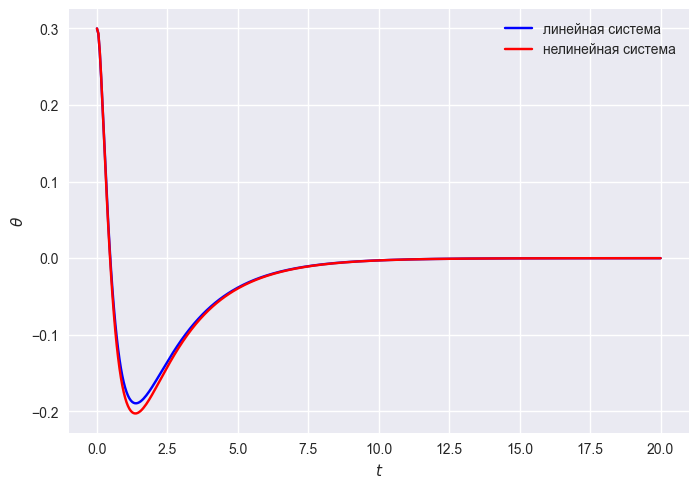

In [7]:
plt.plot(t, lin_sol[:, 0], label='линейная система', color='blue')
plt.plot(t, nonlin_sol[:, 0], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\theta$')
plt.legend()

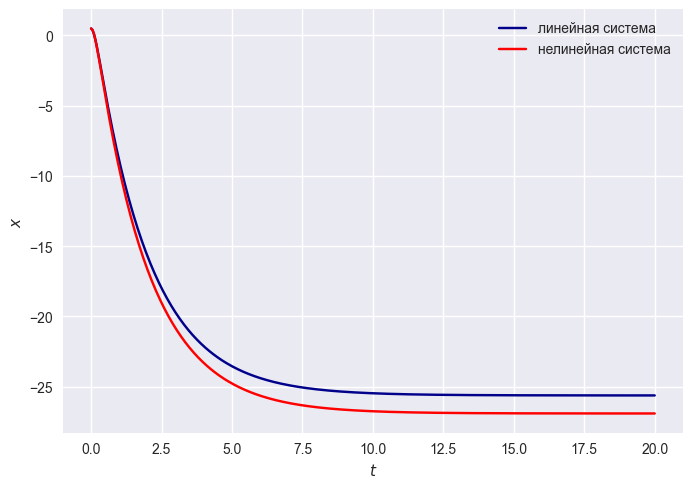

In [8]:
plt.plot(t, lin_sol[:, 1], label='линейная система', color='darkblue')
plt.plot(t, nonlin_sol[:, 1], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$x$')
plt.legend()

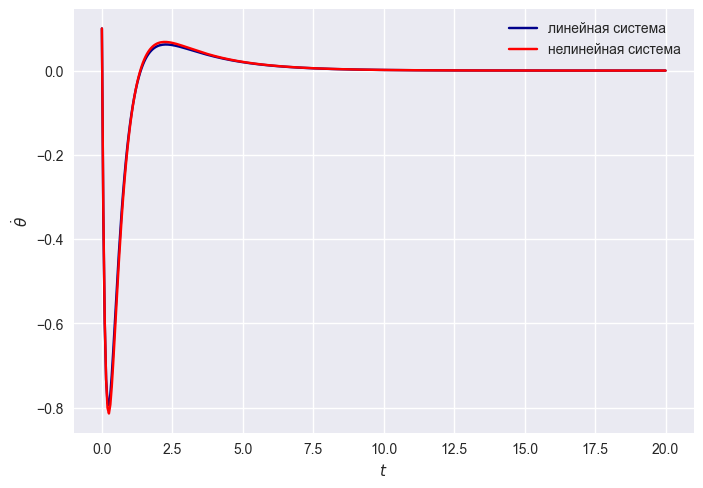

In [9]:
plt.plot(t, lin_sol[:, 2], label='линейная система', color='darkblue')
plt.plot(t, nonlin_sol[:, 2], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{\\theta}$')
plt.legend()

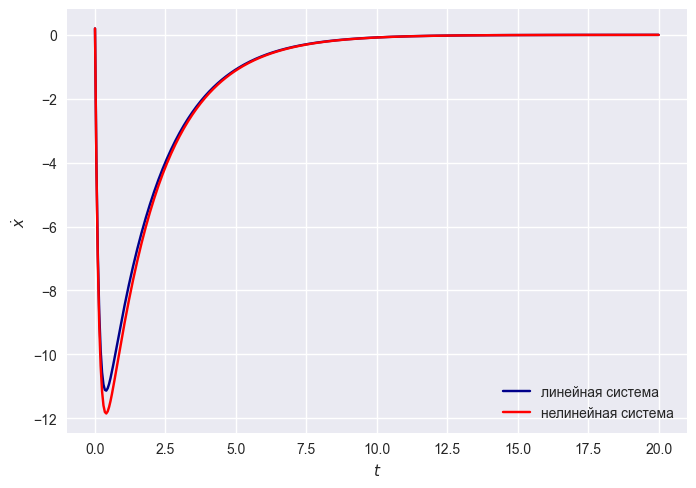

In [10]:
plt.plot(t, lin_sol[:, 3], label='линейная система', color='darkblue')
plt.plot(t, nonlin_sol[:, 3], label='нелинейная система', color='red')
plt.xlabel('$t$')
plt.ylabel('$\\dot{x}$')
plt.legend()